# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Fathi Farhat
- Email: farhatfathi107@gmail.com
- Id Dicoding: farhatfathi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score
import warnings

warnings.filterwarnings("ignore")  # suppress warnings for clean output

In [6]:
import streamlit as st
import pickle

### Menyiapkan data yang akan digunakan

In [7]:
link = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv'
df = pd.read_csv(link)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Dataframe Info

In [8]:
df.shape

(1470, 35)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Identify Null Values

In [10]:
# understanding null values count in 'Attrition'

nan_count = df[df['Attrition'].isna()].shape[0]
print(f"Number of rows with NaN in 'Attrition' column: {nan_count}")

percentage_nan = (nan_count / df.shape[0]) * 100
print(f"Percentage of rows with NaN in 'Attrition' column: {percentage_nan:.2f}%")

Number of rows with NaN in 'Attrition' column: 412
Percentage of rows with NaN in 'Attrition' column: 28.03%


### identify Outliers

In [11]:
# identify outliers

def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [12]:
# Identify numerical columns for outlier analysis
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
for i, col in enumerate(numerical_cols):
    outliers = find_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers")

EmployeeId: 0 outliers
Age: 0 outliers
Attrition: 179 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


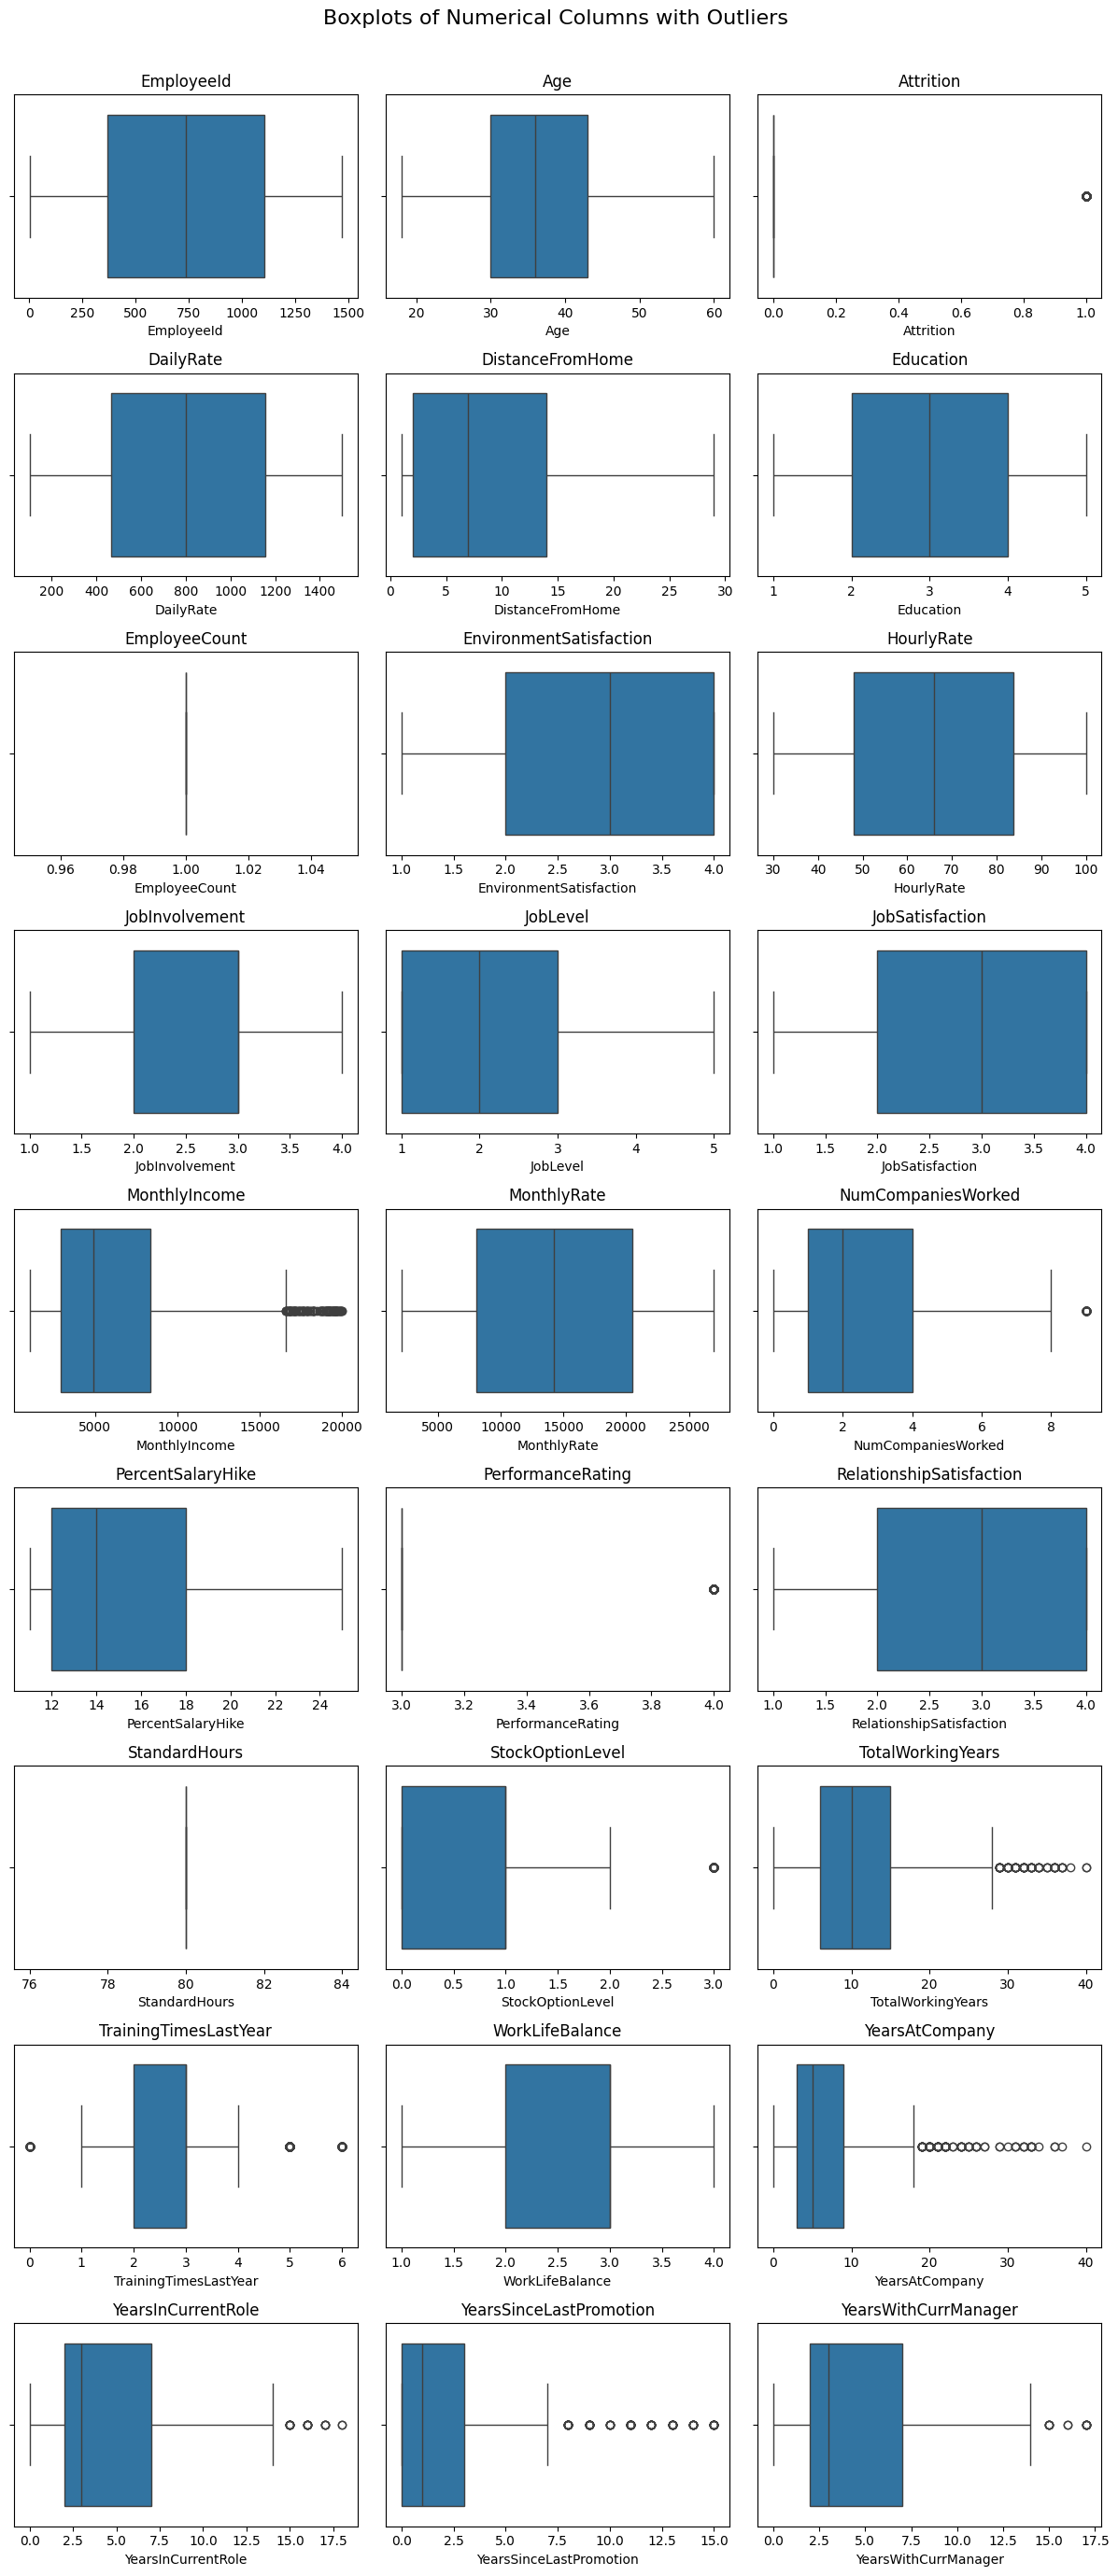

In [14]:

# Tentukan jumlah kolom per baris untuk layout grid
cols_per_row = 3
num_plots = len(numerical_cols)
num_rows = int(np.ceil(num_plots / cols_per_row))

# Buat figure dan axes
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 4, num_rows * 3))
axes = axes.flatten()

# Loop dan plot
for i, col in enumerate(numerical_cols):
    outliers = find_outliers_iqr(df[col])
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

# Hapus subplot kosong jika jumlah plot tidak habis dibagi cols_per_row
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns with Outliers', fontsize=16, y=1.02)
plt.show()

### Feature Correlation

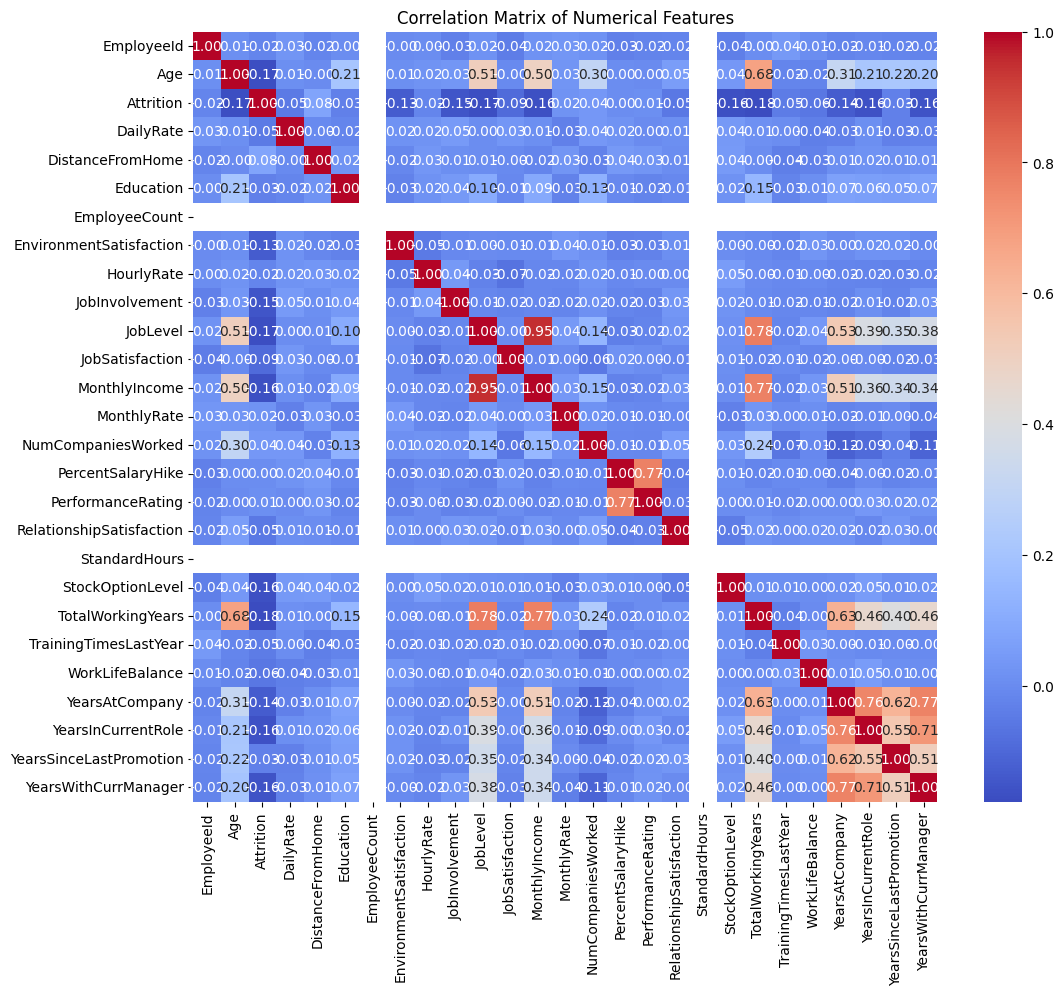

In [15]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preparation / Preprocessing

### Encoding

Encoding process will use OrdinalEncoder to encode categorical data into ordinally numeric.

In [16]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create an OrdinalEncoder object
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

In [17]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,1.0,1444,0.0,1,4,4.0,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,2.0,1141,1.0,11,2,3.0,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2.0,1323,1.0,4,4,1.0,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1.0,555,2.0,26,3,2.0,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,2.0,1194,1.0,2,4,3.0,1,...,2,80,3,20,2,3,5,3,0,2


### Split Data

Splitting data used for training model purpose. Test data contains every row that includes null values from 'Attrition'. Test data will take the proportion of 28.03%.

In [18]:
# Separate rows with and without target ("Attrition")
train_data = df[df['Attrition'].notnull()].copy()  # rows with labels
test_data = df[df['Attrition'].isnull()].copy()    # rows without labels

# Define features (X) and target (y) from the labeled data
X = train_data.drop(columns=["Attrition"])
y = train_data["Attrition"].astype(int)  # convert to integer if needed

# Split the labeled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features for test data (where target is missing)
X_test = test_data.drop(columns=["Attrition"])

### Scaling

In [19]:
# Apply RobustScaler (less sensitive to outliers)
robust_scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Only apply scaling to numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scaling for train, validation, and test data
X_train_scaled[numerical_cols] = robust_scaler.fit_transform(X_train[numerical_cols])
X_val_scaled[numerical_cols] = robust_scaler.transform(X_val[numerical_cols])
X_test_scaled[numerical_cols] = robust_scaler.transform(X_test[numerical_cols])

# Optional: Normalize using MinMaxScaler after RobustScaler (if needed)
normalize = True  # Set to False if normalization isn't needed
if normalize:
    minmax_scaler = MinMaxScaler()
    X_train_scaled[numerical_cols] = minmax_scaler.fit_transform(X_train_scaled[numerical_cols])
    X_val_scaled[numerical_cols] = minmax_scaler.transform(X_val_scaled[numerical_cols])
    X_test_scaled[numerical_cols] = minmax_scaler.transform(X_test_scaled[numerical_cols])

## Modeling

In [20]:
# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Try to include LightGBM if installed
try:
    from lightgbm import LGBMClassifier
    models['LightGBM'] = LGBMClassifier(random_state=42)
except ImportError:
    print("LightGBM is not installed. Skipping...")

# Train and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

LightGBM is not installed. Skipping...

Model: Logistic Regression
Accuracy: 0.8821
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       173
           1       0.89      0.41      0.56        39

    accuracy                           0.88       212
   macro avg       0.89      0.70      0.75       212
weighted avg       0.88      0.88      0.86       212


Model: Random Forest
Accuracy: 0.8443
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       173
           1       1.00      0.15      0.27        39

    accuracy                           0.84       212
   macro avg       0.92      0.58      0.59       212
weighted avg       0.87      0.84      0.79       212


Model: XGBoost
Accuracy: 0.8302
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       173
           1

## Evaluation

In [27]:
# Train the model again
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_val_scaled)
y_prob = logreg.predict_proba(X_val_scaled)[:, 1]

import pickle

# Simpan model terbaik
pickle.dump(logreg, open("logreg_model.pkl", "wb"))

# Simpan RobustScaler
pickle.dump(robust_scaler, open("robust_scaler.pkl", "wb"))

# Simpan MinMaxScaler (jika digunakan)
if normalize:
    pickle.dump(minmax_scaler, open("minmax_scaler.pkl", "wb"))

print("Model logistic regression dan scaler berhasil disimpan.")

Model logistic regression dan scaler berhasil disimpan.


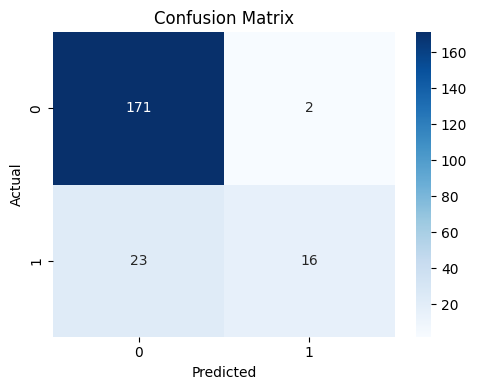

In [29]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

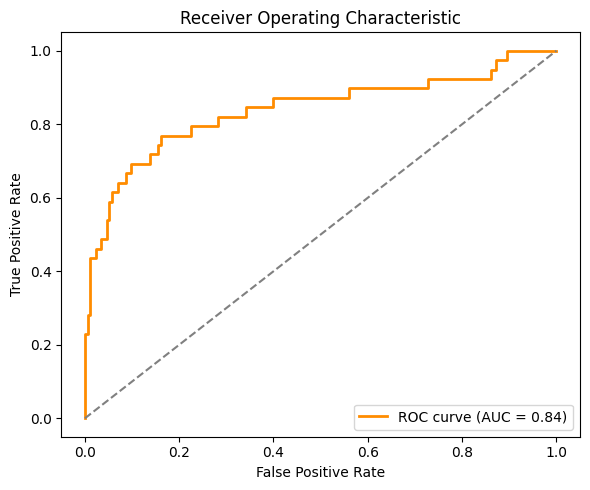

In [30]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

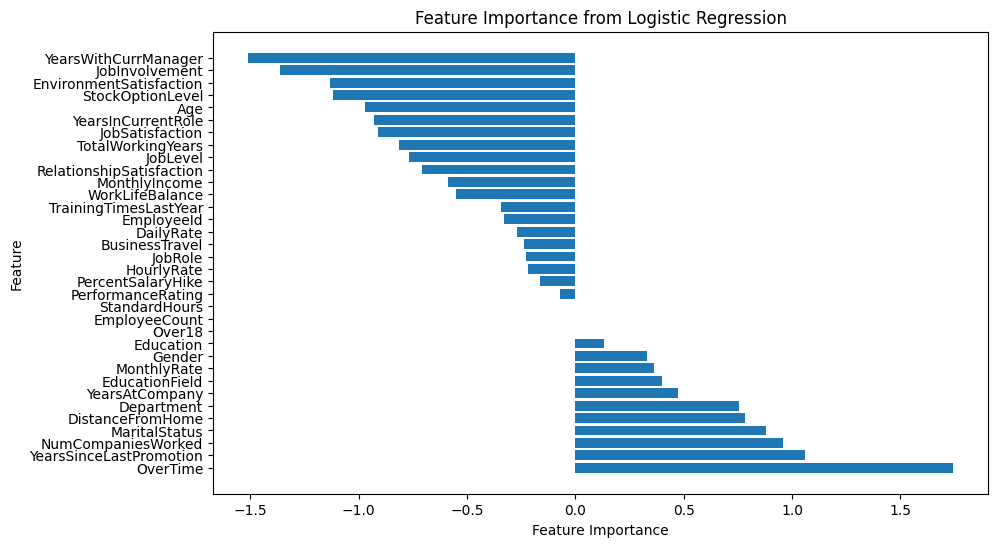

In [31]:
# feature importance

importances = pd.DataFrame(data={
    'Attribute': X_train_scaled.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances['Attribute'], importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.show()


## Deployment

In [33]:
# Load model dan scaler
model = pickle.load(open("logreg_model.pkl", "rb"))
robust_scaler = pickle.load(open("robust_scaler.pkl", "rb"))
minmax_scaler = pickle.load(open("minmax_scaler.pkl", "rb"))

st.title("Employee Attrition Prediction")

# Input user untuk 4 fitur
age = st.number_input("Age", 18, 65)
job_satisfaction = st.slider("Job Satisfaction", 1, 4)
monthly_income = st.number_input("Monthly Income", 1000, 20000)
overtime = st.selectbox("OverTime", ["Yes", "No"])
overtime_bin = 1 if overtime == "Yes" else 0

# Daftar lengkap 34 fitur, urut dan case sensitive sesuai training
feature_names = [
    'EmployeeId', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Buat dataframe 1 baris dengan default 0 semua fitur
data = {feat: [0] for feat in feature_names}
df_input = pd.DataFrame(data)

# Isi kolom input user
df_input.loc[0, 'Age'] = age
df_input.loc[0, 'JobSatisfaction'] = job_satisfaction
df_input.loc[0, 'MonthlyIncome'] = monthly_income
df_input.loc[0, 'OverTime'] = overtime_bin

# Pastikan input yang lain boleh tetap 0, atau bisa disesuaikan bila perlu.

if st.button("Predict"):
    # Transform fitur
    features_scaled = robust_scaler.transform(df_input)
    features_scaled = minmax_scaler.transform(features_scaled)

    # Predict
    pred = model.predict(features_scaled)[0]
    st.success("Attrition" if pred == 1 else "Not Attrition")

2025-05-16 09:15:29.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 09:15:29.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar